![title](https://doity.com.br/media/doity/eventos/evento-20025-logo_organizador.png)

# Prova de Programação para Data Science e Data Analytics

* **Prof. Cleilton Lima Rocha**
* **emails:** climarocha@gmail.com
* **deadline: 11/3 às 23h**
***
* **Titulo do e-mail:** Prova de PDSDA [Fulane, Beltrano]
* **Conteúdo do e-mail:** Envie-me, obrigatoriamente, o código fonte e o report de todos os jupyters notebook (File ==> Download As ==> Html ou PDF), com o nome dos membros da dupla, para um dos meus emails, climarocha@gmail.com ou cleilton_rocha@atlantico.com.br até o dia **11/3 às 23h**, após esta data sua prova valerá no máximo **8 (oito pontos)**.
* **Respostas das questões:** 
    - Quando você julgar necessário construa gráficos para responder as questões e explique-os de forma sucinta com clareza e objetividade. Isso lhe ajudará a se tornar um bom cientista de dados.
    - As questões podem ser respondidas utilizando o **Pyspark**, embora não seja obrigatório.
***
Qualquer dúvida podem me escrever!

### Descrição

Para facilitar a administração da segurança pública, o Departamento de Polícia de Seattle dividiu a cidade em 5 partes, cada uma
com uma delegacia. Cada delegacia foi subdividida em setores, e estes foram divididos em *beats* (hondas).
A administração tem dois *datasets* um chamado **Call_Data**, para obter maiores informações acesse este [link](https://data.seattle.gov/Public-Safety/Call-Data/33kz-ixgy) e outro chamado **Crime_Data**, maiores detalhes [aqui](https://data.seattle.gov/Public-Safety/Crime-Data/4fs7-3vj5) (acesse os links para compreender o dicionário de cada dataset). 

O download do dataset de chamadas está disponível neste [link](https://data.seattle.gov/api/views/33kz-ixgy/rows.csv?accessType=DOWNLOAD) e o download do dataset de crimes está [aqui](https://data.seattle.gov/api/views/4fs7-3vj5/rows.csv?accessType=DOWNLOAD).


O administrador geral pediu que você, cientista de dados, o ajudasse a elaborar um report respondendo algumas perguntas.  O objetivo deste projeto é ajudar a administração fornecendo informações relevantes para ajudá-los a resolver de forma mais rápida uma chamada, um crime ou mesmo replanejar a distribuição das hondas e setores. Como bom cientista de dados que você é, você tem a liberdade de ir além e responder mais perguntas do que as que estão aqui =D, através dos insights que vão surgindo a medida que você mergulha no problema.

**Boa prova e hands on!**

### Questões obrigatórias da avaliação

- Carreque o dataset de chamadas ...

In [3]:
import pandas as pd
dfOriginal = pd.read_csv("Call_Data.csv", delimiter=",")

- Crie variáveis para representar o ano, mês, dia da semana e semana (por exemplo, 2_2018) para o dataset de chamadas.

In [34]:
# dfA = dfOriginal
# dfA['Date'] = dfA['Original Time Queued'].astype('datetime64[ns]')

dfA['year'] = dfA['Date'].dt.year
dfA['month'] = dfA['Date'].dt.month
dfA['weekday'] = dfA['Date'].dt.day_name()

- Elimine os registros cujo precint, setor ou beat seja nulo.

In [35]:
import missingno as msno
import matplotlib.pyplot as plt

df = dfA.dropna(subset=['Precinct', 'Sector', 'Beat'])

- Qual delegacia tem mais setores? E qual tem mais beats?

In [36]:
df2 = df[['Precinct', 'Sector', 'Beat']]

dfSectorsByPrecinct = df2.groupby('Precinct')['Sector'].unique().to_frame().reset_index()
dfSectorsByPrecinct['Sectors'] = dfSectorsByPrecinct['Sector'].apply(lambda x: len(x))

dfSectorsByPrecinct[(dfSectorsByPrecinct['Sectors'].max() == dfSectorsByPrecinct['Sectors'])][['Precinct', 'Sectors']]

# Qual delegacia tem mais setores? R. NORTH com 5 Sectors

,Precinct,Sectors
1,NORTH,5


In [37]:
dfBeatByPrecinct = df2.groupby('Precinct')['Beat'].unique().to_frame().reset_index()
dfBeatByPrecinct['Beats'] = dfBeatByPrecinct['Beat'].apply(lambda x: len(x))

dfBeatByPrecinct[(dfBeatByPrecinct['Beats'].max() == dfBeatByPrecinct['Beats'])][['Precinct', 'Beats']]

# E qual tem mais beats? R. NORTH com 15 Beats

,Precinct,Beats
1,NORTH,15


- Apresente a evolução do número de chamadas, escolha 3 tipos de chamadas, ao longo dos últimos 10 anos.

In [38]:
df["Call Type"].value_counts().nlargest(11)

ONVIEW                           1559755
911                              1318089
TELEPHONE OTHER, NOT 911          902782
ALARM CALL (NOT POLICE ALARM)     113692
POLICE (VARDA) ALARM                 153
HISTORY CALL (RETRO)                  90
IN PERSON COMPLAINT                   68
TEXT MESSAGE                          54
PROACTIVE (OFFICER INITIATED)         46
SCHEDULED EVENT (RECURRING)           30
FK ERROR                               1
Name: Call Type, dtype: int64

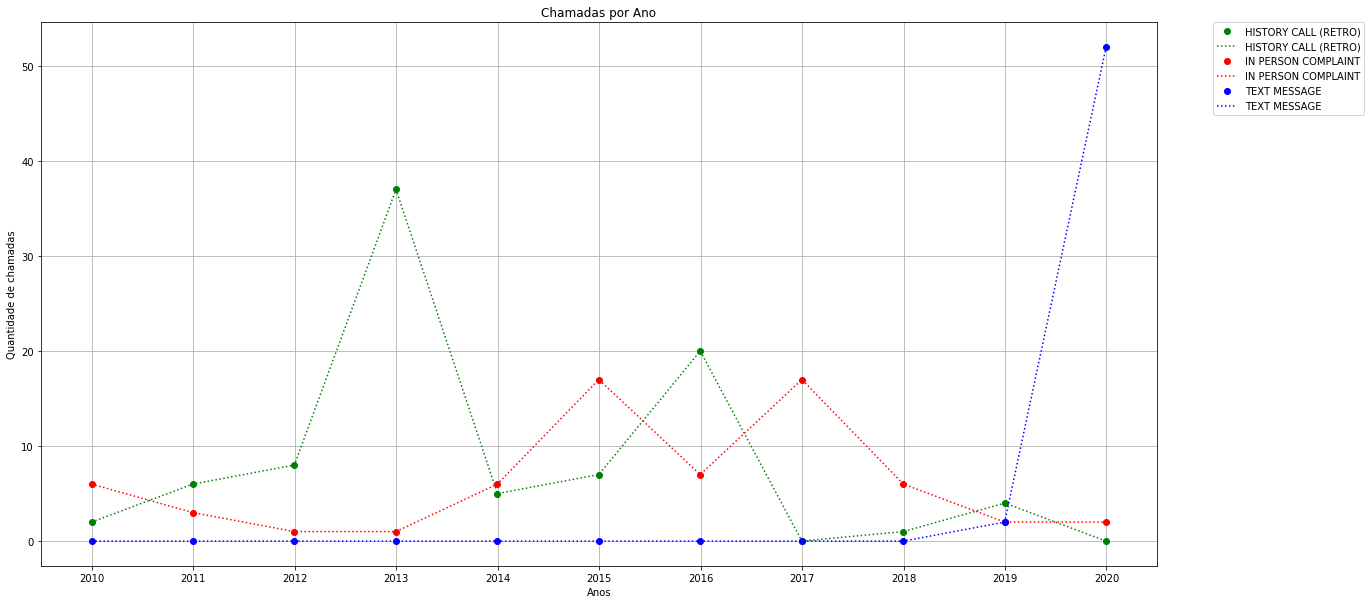

In [39]:
from datetime import datetime

def tratarDataFrame(mainDataFrame, cellType):
    dfTarget = mainDataFrame[mainDataFrame['Call Type'] == cellType]
    dfTarget.index = dfTarget['Date']
    dfTarget = dfTarget.resample('y').count()
    dfTarget = dfTarget.drop(['Original Time Queued', 'Date'], axis=1)
    dfTarget['Date'] = dfTarget.index
    dfTarget.index = range(1, len(dfTarget) + 1)
    dfTarget = dfTarget.rename(index=str, columns={'Call Type': cellType})
    return dfTarget

callTypeA = 'HISTORY CALL (RETRO)'
callTypeB = 'IN PERSON COMPLAINT'
callTypeC = 'TEXT MESSAGE'

dfCallEvolution = df[['Call Type', 'Original Time Queued']]
dfCallEvolution = dfCallEvolution[dfCallEvolution["Call Type"].isin([callTypeA, callTypeB, callTypeC])]
dfCallEvolution['Date'] = dfCallEvolution['Original Time Queued'].astype('datetime64[ns]')

dfA = tratarDataFrame(dfCallEvolution, callTypeA)
dfB = tratarDataFrame(dfCallEvolution, callTypeB)
dfC = tratarDataFrame(dfCallEvolution, callTypeC)

dfCallEvolution = pd.merge(dfA, dfB, on='Date', how='outer')
dfCallEvolution = pd.merge(dfCallEvolution, dfC, on='Date', how='outer')

dfCallEvolution.index = range(1, len(dfCallEvolution) + 1)
dfCallEvolution.fillna(0, inplace=True)

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

date = dfCallEvolution['Date']
data1 = dfCallEvolution[callTypeA]
data2 = dfCallEvolution[callTypeB]
data3 = dfCallEvolution[callTypeC]

data1.size

plt.plot( date, data1, 'go')
plt.plot( date, data1, 'k:', color='green', label=callTypeA)

plt.plot( date, data2, 'ro')
plt.plot( date, data2, 'k:', color='red', label=callTypeB)

plt.plot( date, data3, 'bo')
plt.plot( date, data3, 'k:', color='blue', label=callTypeC)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Chamadas por Ano")

plt.grid(True)
plt.xlabel("Anos")
plt.ylabel("Quantidade de chamadas")
plt.show()

- A delegacia que possui mais setores é a que mais recebe chamadas? Justifique sua resposta.

In [40]:
df['Precinct'].value_counts()

WEST         1172582
NORTH        1037262
SOUTH         646832
EAST          635319
SOUTHWEST     402765
Name: Precinct, dtype: int64

In [41]:
dfwest = df[df['Precinct'] == 'WEST']
dfwest['Sector'].value_counts()

MARY     334933
KING     331799
DAVID    292839
QUEEN    213011
Name: Sector, dtype: int64

In [42]:
dfwest = df[df['Precinct'] == 'NORTH']
dfwest['Sector'].value_counts()

UNION      242640
NORA       226807
BOY        225476
LINCOLN    185296
JOHN       157043
Name: Sector, dtype: int64

Pergunta: A delegacia que possui mais setores é a que mais recebe chamadas? Justifique sua resposta.

Resposta: Não, a delegacia que mais possui chamadas é a WEST. Essa delegacia atende aos 3 setores com o maior número de chamados.

-  Apresente o ranking dos setores, no máximo 10, considerando o percentual de chamadas fraudulentas "FALSE COMPLAINT/UNFOUNDED".

In [43]:
dfFalseComplain = df[df['Event Clearance Description'] == 'FALSE COMPLAINT/UNFOUNDED']
dfFalseComplain['Sector'].value_counts().nlargest(10)

ROBERT     7832
QUEEN      7380
WILLIAM    7162
CHARLIE    7090
UNION      6948
BOY        6407
SAM        5796
OCEAN      5668
LINCOLN    4853
JOHN       4708
Name: Sector, dtype: int64

* Com relação à distribuição das chamadas fraudulentas no tempo, é possível observar momentos dentro dos dias ou dias
da semana onde chamadas deste tipo tem maiores chances de ocorrerem?

In [44]:
dfWeekday = dfFalseComplain
# dfWeekday['Date'] = dfWeekday['Original Time Queued'].astype('datetime64[ns]')
# dfWeekday['weekday'] = dfWeekday['Date'].dt.day_name()

dfWeekday.head()

,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat,Date,year,month,week_day,weekday
25,2009000189368,FALSE COMPLAINT/UNFOUNDED,ALARM CALL (NOT POLICE ALARM),3,"ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE","ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE",06/02/2009 04:35:37 AM,Jun 2 2009 05:10:43:000AM,SOUTHWEST,FRANK,F1,2009-06-02 04:35:37,2009,6,Tuesday,Tuesday
80,2009000189435,FALSE COMPLAINT/UNFOUNDED,ALARM CALL (NOT POLICE ALARM),3,"ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE","ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE",06/02/2009 07:23:39 AM,Jun 2 2009 07:33:09:000AM,SOUTH,ROBERT,R3,2009-06-02 07:23:39,2009,6,Tuesday,Tuesday
86,2009000189442,FALSE COMPLAINT/UNFOUNDED,ALARM CALL (NOT POLICE ALARM),3,"ALARM - COMM, SILENT/AUD BURG (INCL BANKS)","ALARM - COMM, SILENT/AUD BURG (INCL BANKS)",06/02/2009 07:35:33 AM,Jun 2 2009 07:48:07:000AM,SOUTH,OCEAN,O2,2009-06-02 07:35:33,2009,6,Tuesday,Tuesday
97,2009000189456,FALSE COMPLAINT/UNFOUNDED,ALARM CALL (NOT POLICE ALARM),3,"ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE","ALARM - RESIDENTIAL - BURGLARY, SILENT/AUDIBLE",06/02/2009 07:43:34 AM,Jun 2 2009 08:01:57:000AM,NORTH,LINCOLN,L3,2009-06-02 07:43:34,2009,6,Tuesday,Tuesday
111,2009000189473,FALSE COMPLAINT/UNFOUNDED,ALARM CALL (NOT POLICE ALARM),3,"ALARM - COMM, SILENT/AUD BURG (INCL BANKS)","ALARM - COMM, SILENT/AUD BURG (INCL BANKS)",06/02/2009 08:14:50 AM,Jun 2 2009 08:45:26:000AM,NORTH,UNION,U3,2009-06-02 08:14:50,2009,6,Tuesday,Tuesday


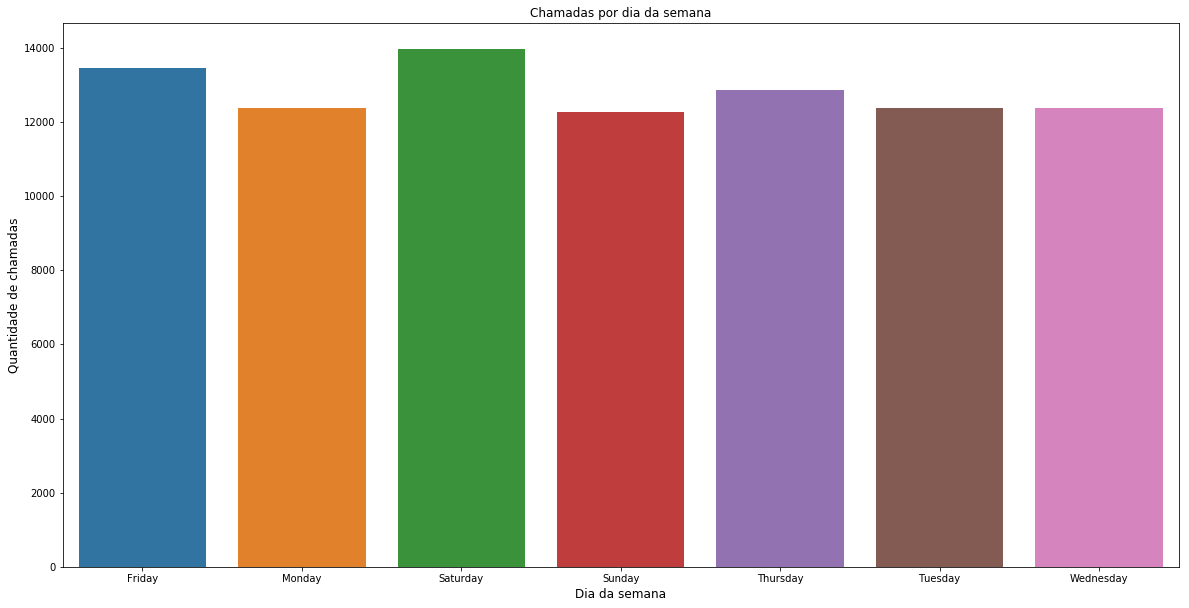

In [45]:
import seaborn as sns
plt.figure(figsize=(20,10))

groupByWeekDay = dfWeekday.groupby(['weekday'])
groupByWeekDay['weekday'].count()

dfFalseComplainByWeekday = pd.DataFrame(groupByWeekDay['weekday'].max())
dfFalseComplainByWeekday['frequency'] = pd.DataFrame(groupByWeekDay['weekday'].count())

sns.barplot(x="weekday", y="frequency", data=dfFalseComplainByWeekday);

plt.title('Chamadas por dia da semana')
plt.ylabel('Quantidade de chamadas', fontsize=12)
plt.xlabel('Dia da semana', fontsize=12)
plt.show()

* Qual o dia em que ocorrem mais chamadas? E qual o tipo de chamada mais recorrente nesse dia? Como esse tipo de chamada evoluiu ao longo dos últimos 5 anos?

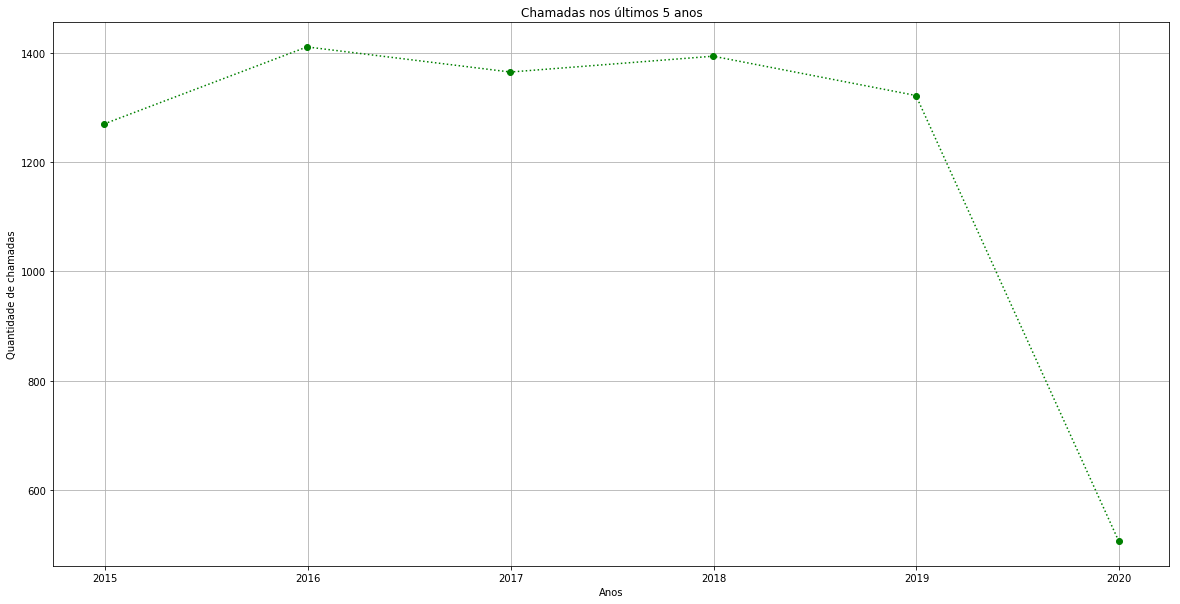

In [46]:
# Qual o dia em que ocorrem mais chamadas? 
# - Saturday

# E qual o tipo de chamada mais recorrente nesse dia? 
dfSaturday = dfWeekday[dfWeekday['weekday'] == 'Saturday']
dfSaturday['Call Type'].value_counts()
# - ALARM CALL (NOT POLICE ALARM) - 11852


# Como esse tipo de chamada evoluiu ao longo dos últimos 5 anos?
dfTargetLast5years = dfSaturday[dfSaturday['Call Type'] == 'ALARM CALL (NOT POLICE ALARM)']
dfTargetLast5years = dfTargetLast5years[['Date', 'Original Time Queued']]
dfTargetLast5years['frequency'] = 1
dfTargetLast5years.index = dfTargetLast5years['Date']
dfTargetLast5years = dfTargetLast5years.resample('y').count()
dfTargetLast5years = dfTargetLast5years.drop(['Date', 'Original Time Queued'], axis=1)
dfTargetLast5years['Date'] = dfTargetLast5years.index
dfTargetLast5years.index = range(1, len(dfTargetLast5years) + 1)

dfTargetLast5years = dfTargetLast5years[dfTargetLast5years['Date'] > '04-30-2014']

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

date = dfTargetLast5years['Date']
data1 = dfTargetLast5years['frequency']


plt.plot( date, data1, 'go')
plt.plot( date, data1, 'k:', color='green')

plt.title("Chamadas nos últimos 5 anos")

plt.grid(True)
plt.xlabel("Anos")
plt.ylabel("Quantidade de chamadas")
plt.show()

# - Esteve praticamente estável, variando entre 1250 e 1400 chamdas por ano.

- Quais chamadas são *outliers* nos últimos 5 anos? Considere como *outlier* as chamadas fora do intervalo de 1,5 da distância inter quartil (Q3-Q1). O que você pode concluir desta informação?

* Quais as chamadas tem recebido mais atenção da polícia nos últimos 5 anos, considere a prioridade?

In [48]:
# !!! Processamento demorado para tratar as datas !!!
dfWithDate = df
# dfWithDate['Date'] = dfWithDate['Original Time Queued'].astype('datetime64[ns]')
dfWithDate['Date final'] = pd.to_datetime(dfWithDate['Arrived Time'], format='%b  %d %Y %H:%M:%S:%f%p')

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [61]:
dfCallByDateLast5years = dfWithDate
dfCallByDateLast5years = dfCallByDateLast5years[dfCallByDateLast5years['Date'] > '04-30-2014']
gorupBy5yearsEventDescription = dfCallByDateLast5years.groupby(['Call Type'])
dfRankingPriority = pd.DataFrame(gorupBy5yearsEventDescription['Priority'].sum().reset_index(name = 'Rank Priority'))
dfRankingPriority.sort_values(by=['Rank Priority'], ascending=False)

,Call Type,Rank Priority
5,ONVIEW,4548533
0,911,1521206
9,"TELEPHONE OTHER, NOT 911",1423880
1,ALARM CALL (NOT POLICE ALARM),182885
4,IN PERSON COMPLAINT,118
6,POLICE (VARDA) ALARM,89
10,TEXT MESSAGE,82
7,PROACTIVE (OFFICER INITIATED),72
3,HISTORY CALL (RETRO),69
8,SCHEDULED EVENT (RECURRING),50


* Apresente o ranking das 10 chamadas mais relevantes no ano de 2018.

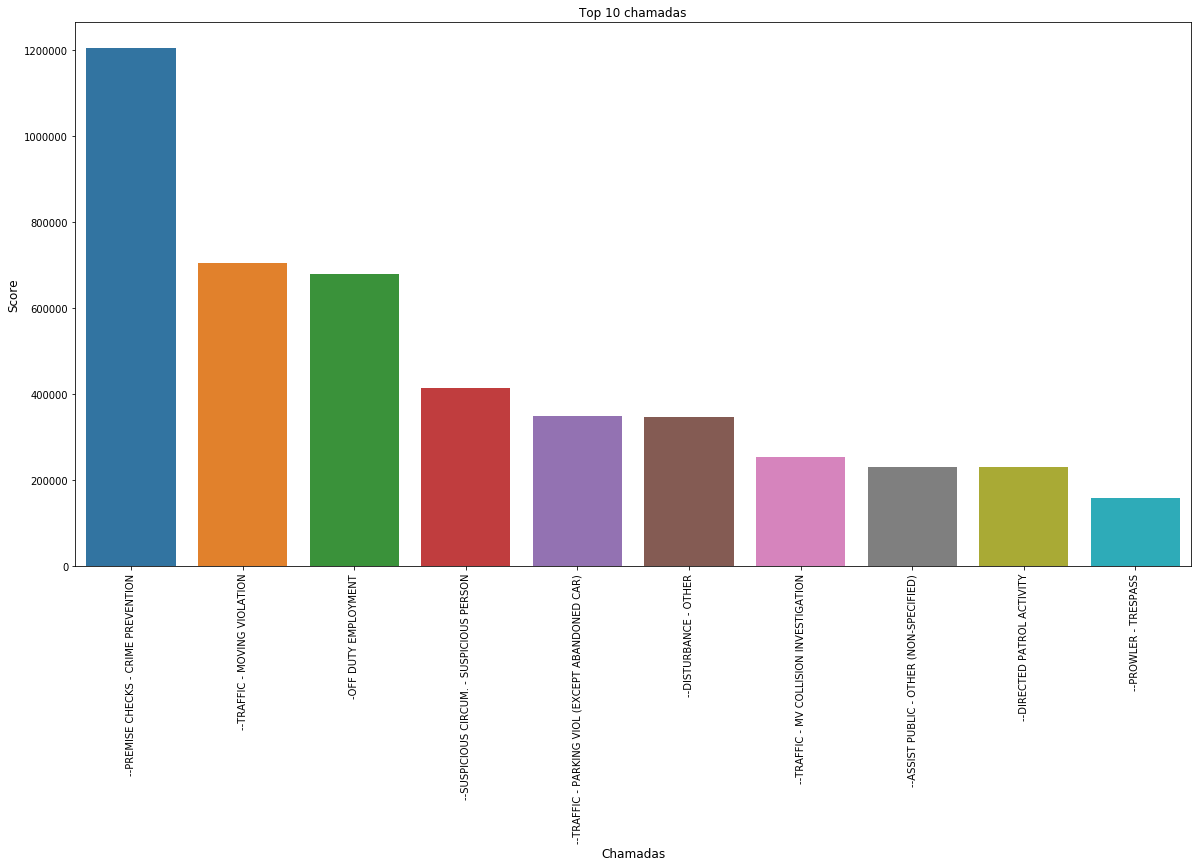

In [67]:
dfCallByDate2018 = dfWithDate
dfCallByDate2018 = dfCallByDate2018[(dfCallByDate2018['Date'] > '12-31-2017') & (dfCallByDate2018['Date'] < '01-01-2019')]
gorupBy5yearsEventDescription = dfCallByDateLast5years.groupby('Final Call Type')
dfRankingPriority = pd.DataFrame(gorupBy5yearsEventDescription['Priority'].sum().reset_index(name = 'Score'))
dfRankingPriority = dfRankingPriority.sort_values(by=['Score'], ascending=False)
dfRankingPriority.head(10)

import seaborn as sns
plt.figure(figsize=(20,10))

sns.barplot(x='Final Call Type', y='Score', data=dfRankingPriority.head(10));

plt.title('Top 10 chamadas')
plt.ylabel('Score', fontsize=12)
plt.xlabel('Chamadas', fontsize=12)
plt.xticks(rotation=90)
plt.show()
# dfCallByDateLast5years['Call Type']

- Quais as chamadas que mais demoram para serem atendidas? Há alguma relação com a prioridade?

In [69]:
dfTimeDeltat = dfWithDate

dfTimeDeltat['delta_time'] = (dfTimeDeltat['Date final'] - dfTimeDeltat['Date']).astype('timedelta64[m]')
dfTimeDeltat = dfTimeDeltat[dfTimeDeltat['delta_time'] >= 0]

gorupByFinalCalltype = dfTimeDeltat.groupby(['Final Call Type'])
dfByDeltaTime = pd.DataFrame(gorupByFinalCalltype['delta_time'].sum().reset_index(name = 'delta time sum'))

dfByDeltaTime = dfByDeltaTime.sort_values(by=['delta time sum'], ascending=False)

dfMergeDeltaPriority = pd.merge(dfByDeltaTime, dfRankingPriority, on='Final Call Type', how='outer')

dfMergeDeltaPriority.corr()
# De a cordo com a correlação dos dados não existe um forte relacionamento entre 
# o tempo para a ocorrência ser atendida e a priodidde.

/usr/local/Cellar/python/3.7.2_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,delta time sum,Score
delta time sum,1.000000,0.678445
Score,0.678445,1.000000


In [70]:
# 5 Chamadas que mais demoraram para serem atendidas
dfByDeltaTime.head(5)

,Final Call Type,delta time sum
123,--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,14515460.0
47,--DISTURBANCE - OTHER,13271624.0
45,--DISTURBANCE - NOISE,8524386.0
135,--TRAFFIC - MOVING VIOLATION,8327298.0
103,--PREMISE CHECKS - CRIME PREVENTION,6955034.0


- Qual é a chamada com mais enganos, ou seja, aquelas que mais mudam de classificação entre o início da chamada e o final da chamada?

In [28]:
# ?

* O número médio de chamadas ao longo dos anos por delegacia tem aumentado ou diminuído?

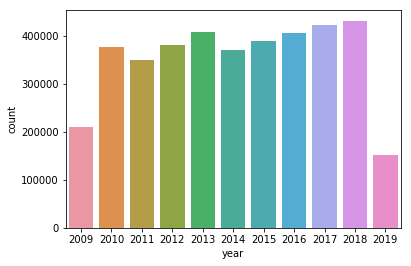

In [75]:
dfCallByYears = dfWithDate

import seaborn as sns
sns.countplot(x='year',data=dfCallByYears)

- Carregue o data set de crimes e elimine todos os elementos que possuam valores nulos.

- Qual o ranking dos 10 crimes que mais ocorreu em seattle nos últimos 3 anos? 

* Qual o setor, a região e o beat mais perigoso, considerando o número total de crimes? E qual crime mais se destacou no setor?

- Crie variáveis para representar o ano, mês, dia da semana e semana (por exemplo, 2_2018) para o dataset de crimes.

- Realize o join do dataset de chamadas com o dataset de crimes considerando os últimos 10 anos. *P.S.:* Observe as chaves de integração.

- Existe alguma relação do número de crimes com o número de chamadas, considerando os últimos 5 anos?

- Qual o ano mais violento considerando o total de crimes?

* Qual o mês, semana e dia mais violento dos últimos 5 anos, considerando o número de crimes e o número de chamadas?

- Crie no mínimo 2 gráficos sobre quaisquer perguntas que você queira responder, considerando o dataset de crimes e explique-os de forma suscinta.

- Crie no mínimo 2 gráficos sobre quaisquer perguntas que você queira responder, considerando o dataset de crimes e chamadas juntas e explique-os de forma suscinta.

- Crie um pacote em python com o nome **help_seattle**, contendo outro pacote chamado **seattle_info**, e este contendo um módulo com informações do dataset de **chamadas** e outro módulo contendo informações do dataset de **crimes** módulo para responder no mínimo 3 das perguntas acima.

- Em sala estudamos sobre módulos e pacotes em Python. Este é o exercício passado em sala de aula e que deve ser entregue junto com a avaliação. 
    - Crie um pacote banco que:
        - Crie um pacote que cadastre contas de pessoas físicas e jurídicas
        - Crie um pacote que conceda empréstimos e informe o valor da prestação considerando:
            - 10% de juros do empréstimo mais 0,5% do número de prestações para pessoas físicas
            - 5% de juros do empréstimo mais 0,3% do número de prestações para pessoas físicas
        - Crie um módulo para realizar as operações de saque, deposito e transferencia, cobrança de tarifa, R\\$-20,00 para PF e R\\$: 10,00 para PF
        - Simule o lucro total do banco considerando o pagamento da tarifa de todos os clientes e os empréstimos realizados.
        - Crie um script em python ou um jupyter notebook que demostre a utilização do pacote

### Desafios

#### Desafio 1 (+3 Pontos extras)

* Faça este [curso online](https://www.datacamp.com/community/open-courses/introducao-a-r) e gratuito de introdução ao R e salve todos o hands on em úm unico script ou arquivo jupyter notebook
* Baixe e configure o R studio  seguindo as instruções desse [tutorial](https://campus.datacamp.com/courses/introducao-a-r/capitulo-1-introducao-ao-basico?ex=1)
* Se quiser você pode baixar o R Studio a partir do Anaconda Navigator e utilizar no Jupyter notebook. Veja [aqui](https://docs.anaconda.com/anaconda/navigator/tutorials/r-lang/) algumas dicas

#### Desafio 2 (+1,5 Ponto extra)

* Crie um spark-job que calcule o número de chamadas feitas de alguma forma através do 911 (considere a programação utilizando **RDD**). Liste o setor, a região e o beat com maior número de chamadas 911? Veja o exemplo de um spark-job no nosso material.